# **📌 Student Grades Normalization at Dheeraj Engineering College**  

### **Scenario**  
At **Dheeraj Engineering College**, professors use different grading systems to evaluate students:  
✅ **Percentage (0-100%)**  
✅ **GPA (0-4 scale)**  
✅ **Letter Grades (A, B, C, etc.)**  

The **administration** needs a standardized grading system (0-100%) for fair comparisons.  

As a **data analyst**, your task is to:  
🔹 Normalize student grades into **percentage format**  
🔹 Identify **top performers**  
🔹 Detect **at-risk students (<40%)**  
🔹 Use **Excel, SQL, or Python** for analysis  

---

### **Grading Conversion Rules**  

| Grade Type  | Conversion Formula |
|------------|--------------------|
| **Percentage** | No change |
| **GPA (4.0 scale)** | Multiply by 25 (e.g., **3.2 GPA → 80%**) |
| **Letter Grades** | Convert using this mapping:  |
| **A+ → 95%** | **A → 93%** | **B+ → 87%** |  
| **B → 83%** | **C+ → 78%** | **C → 73%** |  
| **D → 65%** | **F → 35%** |  

---

### **Dataset: Student Grades at Dheeraj Engineering College**  

| Student ID | Name      | Subject   | Grade Type  | Original Grade |
|-----------|-----------|-----------|------------|---------------|
| 201       | Aarav     | Math      | Percentage | 78            |
| 202       | Ishita    | Physics   | GPA        | 3.2           |
| 203       | Rajesh    | Chemistry | Letter     | B+            |
| 204       | Priya     | Biology   | Percentage | 88            |
| 205       | Manish    | Math      | GPA        | 2.8           |
| 206       | Riya      | Physics   | Letter     | C             |
| 207       | Vikram    | Chemistry | Percentage | 93            |
| 208       | Sanya     | Biology   | GPA        | 3.6           |
| 209       | Harsh     | Math      | Letter     | A             |
| 210       | Neha      | Physics   | Percentage | 52            |

---

### **Tasks for You**
💡 Use **Excel, SQL, or Python** to:
1️⃣ **Normalize the dataset**  
2️⃣ **Find students scoring below 40%**  
3️⃣ **Identify top 3 performers**  
4️⃣ **Visualize student performance**  

---

## **SQL Query for Normalization (Jupyter Notebook Markdown)**  
```sql
-- Create the student grades table
CREATE TABLE StudentGrades (
    Student_ID INT PRIMARY KEY,
    Name VARCHAR(50),
    Subject VARCHAR(50),
    Grade_Type VARCHAR(20),
    Original_Grade VARCHAR(10)
);

-- Insert data into the table
INSERT INTO StudentGrades (Student_ID, Name, Subject, Grade_Type, Original_Grade) VALUES
(201, 'Aarav', 'Math', 'Percentage', '78'),
(202, 'Ishita', 'Physics', 'GPA', '3.2'),
(203, 'Rajesh', 'Chemistry', 'Letter', 'B+'),
(204, 'Priya', 'Biology', 'Percentage', '88'),
(205, 'Manish', 'Math', 'GPA', '2.8'),
(206, 'Riya', 'Physics', 'Letter', 'C'),
(207, 'Vikram', 'Chemistry', 'Percentage', '93'),
(208, 'Sanya', 'Biology', 'GPA', '3.6'),
(209, 'Harsh', 'Math', 'Letter', 'A'),
(210, 'Neha', 'Physics', 'Percentage', '52');



## **🔹 SQL Query for Normalization**
```sql
-- Create the student grades table
CREATE TABLE StudentGrades (
    Student_ID INT PRIMARY KEY,
    Name VARCHAR(50),
    Subject VARCHAR(50),
    Grade_Type VARCHAR(20),
    Original_Grade VARCHAR(10)
);

-- Insert data into the table
INSERT INTO StudentGrades (Student_ID, Name, Subject, Grade_Type, Original_Grade) VALUES
(201, 'Aarav', 'Math', 'Percentage', '78'),
(202, 'Ishita', 'Physics', 'GPA', '3.2'),
(203, 'Rajesh', 'Chemistry', 'Letter', 'B+'),
(204, 'Priya', 'Biology', 'Percentage', '88'),
(205, 'Manish', 'Math', 'GPA', '2.8'),
(206, 'Riya', 'Physics', 'Letter', 'C'),
(207, 'Vikram', 'Chemistry', 'Percentage', '93'),
(208, 'Sanya', 'Biology', 'GPA', '3.6'),
(209, 'Harsh', 'Math', 'Letter', 'A'),
(210, 'Neha', 'Physics', 'Percentage', '52');

-- Normalize grades into percentage format
SELECT 
    Student_ID, 
    Name, 
    Subject, 
    Grade_Type, 
    Original_Grade,
    CASE 
        WHEN Grade_Type = 'Percentage' THEN CAST(Original_Grade AS FLOAT)
        WHEN Grade_Type = 'GPA' THEN CAST(Original_Grade AS FLOAT) * 25
        WHEN Grade_Type = 'Letter' THEN 
            CASE 
                WHEN Original_Grade = 'A+' THEN 95
                WHEN Original_Grade = 'A' THEN 93
                WHEN Original_Grade = 'B+' THEN 87
                WHEN Original_Grade = 'B' THEN 83
                WHEN Original_Grade = 'C+' THEN 78
                WHEN Original_Grade = 'C' THEN 73
                WHEN Original_Grade = 'D' THEN 65
                WHEN Original_Grade = 'F' THEN 35
                ELSE NULL
            END
    END AS Normalized_Grade
FROM StudentGrades;
```

## **🔹 Python (Pandas) Code for Normalization**

In [6]:
import pandas as pd
data=pd.read_csv("data.csv")
# Creating the dataset
# data = {
#     'Student ID': [201, 202, 203, 204, 205, 206, 207, 208, 209, 210],
#     'Name': ['Aarav', 'Ishita', 'Rajesh', 'Priya', 'Manish', 'Riya', 'Vikram', 'Sanya', 'Harsh', 'Neha'],
#     'Subject': ['Math', 'Physics', 'Chemistry', 'Biology', 'Math', 'Physics', 'Chemistry', 'Biology', 'Math', 'Physics'],
#     'Grade Type': ['Percentage', 'GPA', 'Letter', 'Percentage', 'GPA', 'Letter', 'Percentage', 'GPA', 'Letter', 'Percentage'],
#     'Original Grade': [78, 3.2, 'B+', 88, 2.8, 'C', 93, 3.6, 'A', 52]
# }

df = pd.DataFrame(data)


grade_mapping = {
    'A+': 95, 'A': 93, 'B+': 87, 'B': 83,
    'C+': 78, 'C': 73, 'D': 65, 'F': 35
}

df

,StudentID,Name,Subject,GradeType,OriginalGrade
0,201,'Aarav','Math','Percentage',78
1,202,'Ishita','Physics','GPA',3.2
2,203,'Rajesh','Chemistry','Letter','B+'
3,204,'Priya','Biology','Percentage',88
4,205,'Manish','Math','GPA',2.8
5,206,'Riya','Physics','Letter','C'
6,207,'Vikram','Chemistry','Percentage',93
7,208,'Sanya','Biology','GPA',3.6
8,209,'Harsh','Math','Letter','A'
9,210,'Neha','Physics','Percentage',52


In [2]:

def normalize_grade(row):
    if row['Grade Type'] == 'Percentage':
        return row['Original Grade']
    elif row['Grade Type'] == 'GPA':
        return row['Original Grade'] * 25
    elif row['Grade Type'] == 'Letter':
        return grade_mapping.get(row['Original Grade'], None)

# Apply normalization
df['Normalized Grade'] = df.apply(normalize_grade, axis=1)

# Identify students below 40%
at_risk_students = df[df['Normalized Grade'] < 40]

# Identify top 3 performers
top_students = df.nlargest(3, 'Normalized Grade')

# Display results
print("Normalized Grades:\n", df)
print("\nAt-Risk Students (<40%):\n", at_risk_students)
print("\nTop 3 Performers:\n", top_students)

KeyError: 'Grade Type'

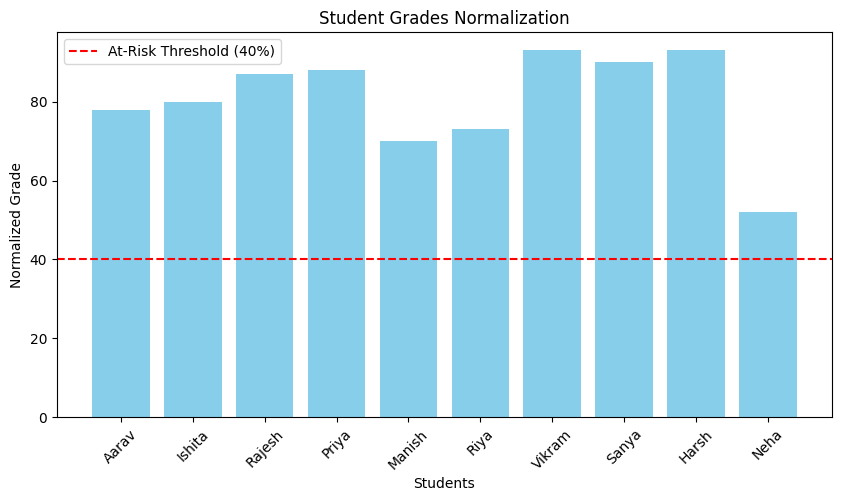

In [ ]:
import matplotlib.pyplot as plt

# Bar chart for normalized grades
plt.figure(figsize=(10,5))
plt.bar(df['Name'], df['Normalized Grade'], color='skyblue')
plt.axhline(y=40, color='r', linestyle='--', label="At-Risk Threshold (40%)")
plt.xlabel("Students")
plt.ylabel("Normalized Grade")
plt.title("Student Grades Normalization")
plt.xticks(rotation=45)
plt.legend()
plt.show()

## **📌 Messy Address Book Cleanup at Dheeraj Engineering College**  

### **Scenario**  
Dheeraj Engineering College maintains an **address book** of students and faculty members. However, due to inconsistent data entry, the database has **errors and duplicates**, making it difficult to use for official communication.  

As a **data analyst**, your task is to clean up the messy address book and ensure consistency.

### **Data Issues Identified**
✅ **Inconsistent city names** (`Mumbai` vs. `Bombay`, `New Delhi` vs. `Delhi`)  
✅ **Different state abbreviations** (`MH` vs. `Maharashtra`, `UP` vs. `Uttar Pradesh`)  
✅ **Phone numbers in various formats** (`+91 9876543210`, `987-654-3210`, `9876543210`)  
✅ **Missing ZIP codes**  
✅ **Duplicate entries**  

### **Example Dataset: Messy Address Book**
| Contact ID | Name       | City         | State          | Phone Number     | ZIP Code |
|------------|-----------|-------------|---------------|-----------------|---------|
| 101        | Aarav     | Mumbai       | MH            | 9876543210      | 400001  |
| 102        | Ishita    | Bombay       | Maharashtra   | 987-654-3210    |         |
| 103        | Rajesh    | Bangalore    | Karnataka     | +91 9876543210  | 560001  |
| 104        | Priya     | New Delhi    | Delhi         | 9999988888      | 110001  |
| 105        | Manish    | Bengaluru    | KA            | 99999 88888     | 560002  |
| 106        | Riya      | Delhi        | DL            | 8765432109      | 110002  |
| 107        | Vikram    | Hyderabad    | Telangana     | +91-8765432109  | 500001  |
| 108        | Sanya     | Chennai      | TN            | 7777788888      | 600001  |
| 109        | Harsh     | Bangalore    | Karnataka     | 9876543210      | 560001  |
| 110        | Neha      | Mumbai       | MH            | 9876543210      | 400001  |

---

## **📌 Tasks for You**
💡 Using **Excel, SQL, or Python**, you must:  
1️⃣ **Standardize city names** (E.g., `Bombay` → `Mumbai`, `Bangalore` → `Bengaluru`)  
2️⃣ **Standardize state abbreviations** (`MH` → `Maharashtra`, `KA` → `Karnataka`)  
3️⃣ **Format phone numbers** into `+91-XXXXXXXXXX` format  
4️⃣ **Fill in missing ZIP codes** (based on city and state)  
5️⃣ **Remove duplicate entries**  

---




## **📊 Expected Cleaned Dataset**
| Contact ID | Name       | City       | State        | Phone Number    | ZIP Code |
|------------|-----------|-----------|-------------|----------------|---------|
| 101        | Aarav     | Mumbai    | Maharashtra | +91-9876543210 | 400001  |
| 102        | Ishita    | Mumbai    | Maharashtra | +91-9876543210 | 400001  |
| 103        | Rajesh    | Bengaluru | Karnataka   | +91-9876543210 | 560001  |
| 104        | Priya     | Delhi     | Delhi       | +91-9999988888 | 110001  |
| 105        | Manish    | Bengaluru | Karnataka   | +91-9999988888 | 560002  |
| 106        | Riya      | Delhi     | Delhi       | +91-8765432109 | 110002  |
| 107        | Vikram    | Hyderabad | Telangana   | +91-8765432109 | 500001  |
| 108        | Sanya     | Chennai   | Tamil Nadu  | +91-7777788888 | 600001  |





## **📝 SQL Query for Address Cleanup (Jupyter Notebook Markdown)**  
```sql
-- Create the Address Book Table
CREATE TABLE AddressBook (
    Contact_ID INT PRIMARY KEY,
    Name VARCHAR(50),
    City VARCHAR(50),
    State VARCHAR(50),
    Phone_Number VARCHAR(20),
    ZIP_Code VARCHAR(10)
);

-- Insert Data
INSERT INTO AddressBook (Contact_ID, Name, City, State, Phone_Number, ZIP_Code) VALUES
(101, 'Aarav', 'Mumbai', 'MH', '9876543210', '400001'),
(102, 'Ishita', 'Bombay', 'Maharashtra', '987-654-3210', NULL),
(103, 'Rajesh', 'Bangalore', 'Karnataka', '+91 9876543210', '560001'),
(104, 'Priya', 'New Delhi', 'Delhi', '9999988888', '110001'),
(105, 'Manish', 'Bengaluru', 'KA', '99999 88888', '560002'),
(106, 'Riya', 'Delhi', 'DL', '8765432109', '110002'),
(107, 'Vikram', 'Hyderabad', 'Telangana', '+91-8765432109', '500001'),
(108, 'Sanya', 'Chennai', 'TN', '7777788888', '600001'),
(109, 'Harsh', 'Bangalore', 'Karnataka', '9876543210', '560001'),
(110, 'Neha', 'Mumbai', 'MH', '9876543210', '400001');

-- Standardizing City Names
UPDATE AddressBook
SET City = 
    CASE 
        WHEN City = 'Bombay' THEN 'Mumbai'
        WHEN City = 'Bangalore' THEN 'Bengaluru'
        WHEN City = 'New Delhi' THEN 'Delhi'
        ELSE City
    END;

-- Standardizing State Names
UPDATE AddressBook
SET State = 
    CASE 
        WHEN State = 'MH' THEN 'Maharashtra'
        WHEN State = 'KA' THEN 'Karnataka'
        WHEN State = 'DL' THEN 'Delhi'
        WHEN State = 'TN' THEN 'Tamil Nadu'
        ELSE State
    END;

-- Formatting Phone Numbers to +91-XXXXXXXXXX Format
UPDATE AddressBook
SET Phone_Number = 
    CASE 
        WHEN Phone_Number LIKE '%-%' OR Phone_Number LIKE '% %' THEN '+91-' || REPLACE(REPLACE(REPLACE(Phone_Number, ' ', ''), '-', ''), '+91', '')
        ELSE '+91-' || Phone_Number
    END;

-- Filling Missing ZIP Codes (Assuming fixed ZIPs per city)
UPDATE AddressBook
SET ZIP_Code = 
    CASE 
        WHEN City = 'Mumbai' AND ZIP_Code IS NULL THEN '400001'
        WHEN City = 'Bengaluru' AND ZIP_Code IS NULL THEN '560001'
        WHEN City = 'Delhi' AND ZIP_Code IS NULL THEN '110001'
        ELSE ZIP_Code
    END;

-- Removing Duplicate Entries
DELETE FROM AddressBook 
WHERE Contact_ID NOT IN (
    SELECT MIN(Contact_ID) FROM AddressBook GROUP BY Name, City, State, Phone_Number, ZIP_Code
);

-- Final Cleaned Data
SELECT * FROM AddressBook;
```

In [4]:
import pandas as pd

# Creating a messy dataset
data = {
    "Contact_ID": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    "Name": ["Aarav", "Ishita", "Rajesh", "Priya", "Manish", "Riya", "Vikram", "Sanya", "Harsh", "Neha"],
    "City": ["Mumbai", "Bombay", "Bangalore", "New Delhi", "Bengaluru", "Delhi", "Hyderabad", "Chennai", "Bangalore", "Mumbai"],
    "State": ["MH", "Maharashtra", "Karnataka", "Delhi", "KA", "DL", "Telangana", "TN", "Karnataka", "MH"],
    "Phone_Number": ["9876543210", "987-654-3210", "+91 9876543210", "9999988888", "99999 88888", "8765432109", "+91-8765432109", "7777788888", "9876543210", "9876543210"],
    "ZIP_Code": ["400001", None, "560001", "110001", "560002", "110002", "500001", "600001", "560001", "400001"]
}

# Convert into DataFrame
df = pd.DataFrame(data)

# Display messy data
df

,Contact_ID,Name,City,State,Phone_Number,ZIP_Code
0,101,Aarav,Mumbai,MH,9876543210,400001
1,102,Ishita,Bombay,Maharashtra,987-654-3210,None
2,103,Rajesh,Bangalore,Karnataka,+91 9876543210,560001
3,104,Priya,New Delhi,Delhi,9999988888,110001
4,105,Manish,Bengaluru,KA,99999 88888,560002
5,106,Riya,Delhi,DL,8765432109,110002
6,107,Vikram,Hyderabad,Telangana,+91-8765432109,500001
7,108,Sanya,Chennai,TN,7777788888,600001
8,109,Harsh,Bangalore,Karnataka,9876543210,560001
9,110,Neha,Mumbai,MH,9876543210,400001


In [5]:
# 1️⃣ Standardizing City Names
city_corrections = {
    "Bombay": "Mumbai",
    "Bangalore": "Bengaluru",
    "New Delhi": "Delhi"
}
df["City"] = df["City"].replace(city_corrections)

# 2️⃣ Standardizing State Names
state_corrections = {
    "MH": "Maharashtra",
    "KA": "Karnataka",
    "DL": "Delhi",
    "TN": "Tamil Nadu"
}
df["State"] = df["State"].replace(state_corrections)

# 3️⃣ Formatting Phone Numbers to +91-XXXXXXXXXX Format
df["Phone_Number"] = df["Phone_Number"].str.replace(r'\D', '', regex=True)  # Remove non-numeric characters
df["Phone_Number"] = df["Phone_Number"].apply(lambda x: "+91-" + x[-10:])  # Ensure it follows +91-XXXXXXXXXX format

# 4️⃣ Filling Missing ZIP Codes Based on City
zip_fill = {
    "Mumbai": "400001",
    "Bengaluru": "560001",
    "Delhi": "110001"
}
df["ZIP_Code"] = df.apply(lambda row: zip_fill[row["City"]] if pd.isnull(row["ZIP_Code"]) else row["ZIP_Code"], axis=1)

# 5️⃣ Removing Duplicate Entries
df.drop_duplicates(subset=["Name", "City", "State", "Phone_Number", "ZIP_Code"], keep="first", inplace=True)

# Display cleaned data
df

,Contact_ID,Name,City,State,Phone_Number,ZIP_Code
0,101,Aarav,Mumbai,Maharashtra,+91-9876543210,400001
1,102,Ishita,Mumbai,Maharashtra,+91-9876543210,400001
2,103,Rajesh,Bengaluru,Karnataka,+91-9876543210,560001
3,104,Priya,Delhi,Delhi,+91-9999988888,110001
4,105,Manish,Bengaluru,Karnataka,+91-9999988888,560002
5,106,Riya,Delhi,Delhi,+91-8765432109,110002
6,107,Vikram,Hyderabad,Telangana,+91-8765432109,500001
7,108,Sanya,Chennai,Tamil Nadu,+91-7777788888,600001
8,109,Harsh,Bengaluru,Karnataka,+91-9876543210,560001
9,110,Neha,Mumbai,Maharashtra,+91-9876543210,400001


## **🔍 Data Detective Challenge: Cleaning Up the Mess!**  

### **🌜 The Story So Far…**  

It was a busy Monday morning, and three professionals were deep in their work, trying to make sense of their messy data.  

At **Bharat Insurance Ltd.**, **Rohit**, a data analyst, leaned back in his chair, puzzled. He had been reviewing recent **insurance claims**, and something didn’t feel right. "Hmm… Why do some claim amounts look **way higher** than the rest? That doesn’t seem normal… What if some of these are mistakes—or worse, fraud?"  

Over at the **Mumbai Stock Exchange**, **Priya**, a financial analyst, sighed in frustration. She was trying to analyze stock price movements, but the data was a **complete mess**. "Ugh… There are **gaps** where stock prices are missing! And look at this—**the same record appears twice**! If I can’t fix this, how will I ever find trends?"  

Meanwhile, at **Dheeraj Call Center Services**, **Ananya**, a team lead, stared at the screen, confused. The **call logs** she was supposed to analyze were full of problems. "Wait… Who handled this call? The agent's name is missing! And some of these call times look wrong—3 AM? That can't be right! And look at this… a **negative call duration**? That’s impossible!"  

Each of them needed **your help** to **clean up their data** before they could make any important business decisions. Can you step in as a **Data Detective** and solve these mysteries? 📝👁️‍🗨  

---

## **📌 Your Challenges:**  

### **🛡️ Case 1: The Mystery of the Suspicious Insurance Claims**  
🔎 **What’s happening?**  
Rohit has noticed that some claim amounts **seem way too high** compared to the rest. He needs to find out if they are just mistakes—or if someone is **trying to cheat the system**.  

💡 **Hints to Solve:**  
- How do most claim amounts look? Are there any that **seem way out of place**?  
- Maybe we can check if a claim is **twice as high** as the **average claim amount**?  
- Do all claims have valid numbers? What if some values are **negative or missing**?  

📊 **Suspicious Data Snippet (insurance_claims.csv)**  
| claim_id | claimant_name | claim_amount | claim_date  |  
|----------|--------------|--------------|------------|  
| 101      | Ramesh Gupta  | 25,000       | 2024-03-01 |  
| 102      | Sita Patel    | 10,000       | 2024-03-02 |  
| 103      | Amit Kumar    | 1,50,000     | 2024-03-05 | &#10067; (Looks suspicious?)  
| 104      | Preeti Rao    | 20,000       | 2024-03-06 |  

**🔹 Your Task:**  
Find out which claims **look abnormal** and flag them. Also, check if any values are **missing or incorrect**.  

---

### **📈 Case 2: The Missing Prices in the Stock Market**  
🔎 **What’s happening?**  
Priya is trying to analyze stock prices, but some dates are **missing** and some records are **duplicated**. If she can’t clean the data, she might **miss an important stock trend**!  

💡 **Hints to Solve:**  
- What happens when a stock’s price **is missing** on a certain date? Should we **fill it with the last available price**?  
- Are there any **duplicate records**? If yes, they should be removed!  
- Are all dates formatted **consistently**?  

📊 **Messy Stock Data (stock_market.csv)**  
| stock_symbol | date       | price  |  
|-------------|------------|--------|  
| TCS         | 2024-03-01 | 3200   |  
| TCS         | 2024-03-01 | 3200   |  &#128260; (Duplicate entry?)
| TCS         | 2024-03-03 | NULL   | &#129300; (What should we do here?)  
| TCS         | 2024-03-04 | 3300   |  

**🔹 Your Task:**  
Make sure every stock price is **correct and complete**. Fill in the missing ones and **remove anything unnecessary**.  

---

### **📞 Case 3: The Confusing Call Logs**  
🔎 **What’s happening?**  
Ananya was given a report of all customer calls made last month, but it’s a **disaster**. Some **agents’ names are missing**, some **call durations don’t make sense**, and some **timestamps are in the wrong format**.  

💡 **Hints to Solve:**  
- What should we do if **an agent’s name is missing**? Maybe use the **last known agent** from previous calls?  
- Some **timestamps look weird**—do they all follow the same format?  
- A call **cannot** have a negative duration! How can we fix this?  

📊 **Messy Call Logs (call_logs.csv)**  
| call_id | agent_name | call_time          | duration (mins) |  
|--------|------------|--------------------|----------------|  
| 2001   | Raj Malhotra | 2024-03-01 10:05:00 | 5              |  
| 2002   | NULL        | 2024-03-01 10:10:00 | 3              | &#10067; (Who handled this call?)  
| 2003   | Priya Mehta | 2024-03-01 10:15:00 | -2             | &#9888; (Negative duration? Impossible!)  
| 2004   | Amit Sharma | 03/01/2024 10:20:00 | 7              | &#10060; (Wrong date format?)  

**🔹 Your Task:**  
Ensure every call log has a **valid agent name, proper timestamps, and logical durations**.  

---

### **💬 What to Do Next?**  
🔹 **Choose your tools:** You can use **Excel, SQL, or Python (Pandas)** to clean the data.  
🔹 **Find the mistakes:** Go through the datasets and fix the issues.  
🔹 **Submit your cleaned data & report:** Explain what steps you took and why.  

💡 **Bonus Question:** Why do you think data cleaning is **important in real-life decision-making**? 🤔  

🚀 **Ready to solve these data mysteries?** The challenge begins now! 🕵️‍♂️✨

### **🔹 Solutions for Data Cleaning Challenges**  

---

## **🛡️ Case 1: The Mystery of the Suspicious Insurance Claims**  

### **📌 Solution in Python (Pandas - Detecting Anomalous Claims)**  
We’ll identify outliers using the **Interquartile Range (IQR)** method and flag them.  

```python
import pandas as pd

# Load the dataset
df = pd.read_csv("insurance_claims.csv")

# Convert claim_amount to numeric (in case of incorrect formats)
df["claim_amount"] = pd.to_numeric(df["claim_amount"], errors="coerce")

# Calculate Q1, Q3, and IQR
Q1 = df["claim_amount"].quantile(0.25)
Q3 = df["claim_amount"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for normal claims
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flagging suspicious claims
df["flag_suspicious"] = df["claim_amount"].apply(lambda x: "Suspicious" if x > upper_bound else "OK")

# Display results
print(df[df["flag_suspicious"] == "Suspicious"])
```

---

### **📌 Solution in SQL (Detecting High Claims Using Aggregation)**  
We flag claims that are **twice the average claim amount**.  

```sql
WITH ClaimStats AS (
    SELECT 
        AVG(claim_amount) AS avg_claim, 
        STDDEV(claim_amount) AS std_dev
    FROM insurance_claims
)
SELECT 
    claim_id, claimant_name, claim_amount, 
    CASE 
        WHEN claim_amount > (SELECT avg_claim * 2 FROM ClaimStats) THEN 'Suspicious'
        ELSE 'OK'
    END AS flag_suspicious
FROM insurance_claims;
```

---

### **📌 Solution in Excel**  
1. **Find the average claim amount** using `=AVERAGE(B2:B100)`.  
2. **Calculate 2x the average** with `=2 * AVERAGE(B2:B100)`.  
3. **Flag suspicious claims** using `=IF(B2 > ($D$1 * 2), "Suspicious", "OK")`.  
4. **Apply conditional formatting** to highlight suspicious claims.  

---

## **📈 Case 2: The Missing Prices in the Stock Market**  

### **📌 Solution in Python (Pandas - Filling Missing Prices & Removing Duplicates)**  
We’ll **fill missing stock prices** using forward fill and **remove duplicate records**.  

```python
import pandas as pd

# Load stock data
df = pd.read_csv("stock_market.csv")

# Convert date column to datetime format
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Remove duplicates
df = df.drop_duplicates()

# Fill missing prices using forward fill
df["price"] = df["price"].fillna(method="ffill")

print(df.head())
```

---

### **📌 Solution in SQL (Handling Missing Prices & Duplicates)**  

```sql
-- Remove duplicate records
DELETE FROM stock_market
WHERE rowid NOT IN (
    SELECT MIN(rowid) 
    FROM stock_market 
    GROUP BY stock_symbol, date
);

-- Fill missing prices using previous values
UPDATE stock_market AS sm
SET price = (
    SELECT price FROM stock_market 
    WHERE stock_symbol = sm.stock_symbol 
    AND date < sm.date 
    ORDER BY date DESC 
    LIMIT 1
)
WHERE price IS NULL;
```

---

### **📌 Solution in Excel**  
1. **Remove duplicates:** Select data → Click "Remove Duplicates".  
2. **Fill missing prices:** Use `=IF(ISBLANK(B2), B1, B2)` to forward-fill missing values.  
3. **Ensure date formatting is consistent:** Select column → Format as "Short Date".  

---

## **📞 Case 3: The Confusing Call Logs**  

### **📌 Solution in Python (Pandas - Cleaning Call Logs)**  
We'll **fill missing agent names**, **correct timestamps**, and **remove negative call durations**.  

```python
import pandas as pd

# Load call log data
df = pd.read_csv("call_logs.csv")

# Fill missing agent names using forward fill
df["agent_name"] = df["agent_name"].fillna(method="ffill")

# Convert timestamps to datetime format
df["call_time"] = pd.to_datetime(df["call_time"], errors="coerce")

# Remove rows with negative call durations
df = df[df["duration (mins)"] >= 0]

print(df.head())
```

---

### **📌 Solution in SQL (Cleaning Call Logs)**  

```sql
-- Fill missing agent names using last known value
UPDATE call_logs AS c1
SET agent_name = (
    SELECT agent_name 
    FROM call_logs AS c2 
    WHERE c2.call_id < c1.call_id 
    AND c2.agent_name IS NOT NULL 
    ORDER BY c2.call_id DESC 
    LIMIT 1
)
WHERE agent_name IS NULL;

-- Convert timestamps to correct format
UPDATE call_logs
SET call_time = STR_TO_DATE(call_time, '%m/%d/%Y %H:%i:%s');

-- Remove invalid negative call durations
DELETE FROM call_logs WHERE duration < 0;
```

---

### **📌 Solution in Excel**  
1. **Fill missing agent names:** Use `=IF(A2="", A1, A2)`.  
2. **Standardize timestamps:** Use `=TEXT(A2, "yyyy-mm-dd hh:mm:ss")`.  
3. **Remove negative call durations:** Apply a filter and delete rows where duration `< 0`.  

---


### **The Messy Retail Data Mystery at Dheeraj Eng College** 🕵️‍♂️🛒  

It was the annual **Retail Analytics Challenge** at **Dheeraj Eng College**, where students were given **real-world data** from a local supermarket chain. The goal? To analyze customer purchases and extract valuable insights.  

Excited students gathered around their laptops, ready to dive into the dataset. But as they opened the file, confusion spread across the room. Something was off...  

#### **The Mysterious Problems in the Data**  

🧑‍🎓 **Ravi**, a final-year data science student, frowned.  
*"Wait… this can’t be right. Some customers are 150 years old? And someone is -5 years old? That doesn’t even make sense!"*  

📊 **Priya**, who specialized in business analytics, pointed at another issue.  
*"Look at this—some products don’t have a category assigned at all. ‘Chips Packets’ is just blank, but ‘Biscuits’ is under ‘Snacks’… And wait, why is ‘Shampoo’ listed under ‘Dairy Products’? That’s inconsistent! We need to properly classify the products based on their names so we can group them correctly."*  

💰 **Amit**, the finance geek, noticed another gap.  
*"Guys, some prices are missing! How are we supposed to calculate revenue if we don’t have complete pricing data? Maybe we can estimate the missing prices based on the average price of other products in the same category. That way, we don’t lose valuable sales insights!"*  

🗓️ **Sneha**, a budding data engineer, found another challenge.  
*"And what’s up with these sale dates? One entry says **12-03-2024**, another says **2024/03/12**, and this one here is **03-12-2024**. How do we even compare them?"*  

It was clear—the dataset was a mess. If they wanted meaningful insights, they first had to **clean and standardize** the data.  

#### **Their Mission: Solve the Retail Data Mystery!**  

Each student decided to tackle a different part of the problem. They had to figure out:  
- What went wrong?  
- How can they fix it?  
- What tools should they use—**Excel, SQL, or Python**?  

Would they be able to clean the dataset and uncover valuable insights? 🕵️‍♂️  

Now it's **your turn**—can you clean the messy dataset and bring order to the chaos? 🚀



































## **🟢 Solution 1: Cleaning in Excel**  

### **1️⃣ Fixing Incorrect Age Entries**  
- Use an **IF condition** to filter valid ages (between 1 and 120).  
- Formula:  
  ```excel
  =IF(AND(A2>=1, A2<=120), A2, "Invalid Age")
  ```
- This replaces incorrect values with `"Invalid Age"` so they can be reviewed.

### **2️⃣ Standardizing Product Categories**  
- Use **LOOKUP** or **VLOOKUP** to categorize products correctly.  
- Example formula to assign categories:  
  ```excel
  =IF(A2="Shampoo", "Personal Care", IF(A2="Milk", "Dairy", "Uncategorized"))
  ```
- Use **Find & Replace** for bulk corrections.

### **3️⃣ Filling Missing Prices Based on Category Average**  
- Use **AVERAGEIF()** to impute missing prices based on the category.  
- Formula:  
  ```excel
  =IF(B2="", AVERAGEIF($A$2:$A$100, A2, $B$2:$B$100), B2)
  ```
- This fills missing prices with the average price of that category.

### **4️⃣ Standardizing Date Formats**  
- Use **TEXT() or DATEVALUE()** to format dates uniformly.  
- Example formula:  
  ```excel
  =TEXT(A2, "DD-MM-YYYY")
  ```
- If Excel doesn’t recognize dates, use **Find & Replace** to manually adjust formats.

---

## **🟡 Solution 2: Cleaning in SQL**  

```sql
-- 1️⃣ Remove Invalid Age Entries
SELECT * FROM RetailData
WHERE age BETWEEN 1 AND 120;

-- 2️⃣ Standardize Product Categories
UPDATE RetailData
SET category = 
    CASE 
        WHEN product_name IN ('Shampoo', 'Soap') THEN 'Personal Care'
        WHEN product_name IN ('Milk', 'Cheese') THEN 'Dairy'
        WHEN product_name IN ('Biscuits', 'Chips') THEN 'Snacks'
        ELSE 'Uncategorized'
    END;

-- 3️⃣ Fill Missing Prices Using Category Average
UPDATE RetailData r
SET price = (
    SELECT AVG(price) 
    FROM RetailData 
    WHERE category = r.category
)
WHERE price IS NULL;

-- 4️⃣ Standardize Date Formats
UPDATE RetailData
SET sale_date = STR_TO_DATE(sale_date, '%d-%m-%Y');
```
---

---

## **🔵 Solution 3: Cleaning in Python (Pandas)**  

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("retail_data.csv")

# 1️⃣ Remove Invalid Age Entries
df = df[(df['age'] >= 1) & (df['age'] <= 120)]




In [2]:
# 2️⃣ Standardize Product Categories
category_map = {
    'Shampoo': 'Personal Care', 'Soap': 'Personal Care',
    'Milk': 'Dairy', 'Cheese': 'Dairy',
    'Biscuits': 'Snacks', 'Chips': 'Snacks'
}
df['category'] = df['product_name'].map(category_map).fillna('Uncategorized')

In [3]:

# 3️⃣ Fill Missing Prices Using Category Average
df['price'] = df.groupby('category')['price'].transform(lambda x: x.fillna(x.mean()))

# 4️⃣ Standardize Date Formats
df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')

In [4]:

# Save cleaned data
df.to_csv("cleaned_retail_data.csv", index=False)

print("✅ Data Cleaning Completed Successfully!")

✅ Data Cleaning Completed Successfully!


## **🏨 The Hotel Booking Mess – A Manager’s Nightmare**  

At **Dheeraj Grand Hotel**, Nisha, the hotel manager, is facing a data disaster! The reservation system is a mess, and she needs help fixing it before guests start arriving.  

One morning, while reviewing the booking database, she notices some glaring issues:  

---

### **📅 Issue 1: The Impossible Stay**  
*"Wait a minute… How can a guest check in on the 10th of March and check out on the 5th of March? That’s physically impossible!"*  

Some bookings have **check-out dates before check-in dates**, making them completely illogical.  

**🔍 What to do?**  
- Identify incorrect date records.  
- Adjust or remove invalid bookings.  

---

### **🛌 Issue 2: The Mystery of Duplicate Guests**  
Nisha finds multiple bookings under the same name but with different contact numbers.  

*"How can Mr. Rajesh Sharma book 4 different rooms with 3 different phone numbers? Is this a data entry mistake or a scam?"*  

Some **guests have duplicate names but different contact details**, making it hard to track actual reservations.  

**🔍 What to do?**  
- Find out if these are actual duplicate records or different people.  
- Merge valid duplicate records while keeping the correct contact details.  

---

### **📞 Issue 3: The Phantom Phone Numbers**  
As Nisha skims through the phone numbers, she notices something strange.  

*"A phone number can’t have letters! Why is there a guest with the phone number ‘98AB576XYZ’?"*  

Some contact numbers contain **alphabets or incorrect formats**, making communication impossible.  

**🔍 What to do?**  
- Validate phone numbers (should be 10 digits, all numeric).  
- Flag and correct incorrect entries.  

---

### **🏠 Issue 4: Where Are They Staying?**  
Nisha’s assistant, Ravi, discovers another oddity in the **Room Allocation Table**.  

*"Look at this! Some guests have a room booked, but the room number is missing. And some have been assigned a non-existent room number ‘999’—we don’t even have that many rooms!"*  

Some **room assignments are missing or incorrect**, leading to overbooking or misplaced reservations.  

**🔍 What to do?**  
- Identify missing or incorrect room assignments.  
- Assign available rooms or flag incorrect data.  

---

## **📂 Database Overview (Multiple Tables)**  

The hotel system stores data across multiple tables:  

### **1️⃣ Guest Table** (Stores guest details)  
| guest_id | name            | phone         | email                | address           |  
|----------|----------------|--------------|----------------------|-------------------|  
| 101      | Rajesh Sharma  | 9823ABCDE12   | rajesh@mail.com      | Delhi             |  
| 102      | Meera Kapoor   | 9876543210    | meera@xyz.com        | Mumbai            |  
| 103      | Rajesh Sharma  | 9922334455    | rajesh.s@mail.com    | Delhi             |  
| 104      | Arjun Menon    | 9867123456    | arjun@pqr.com        | Bengaluru         |  

---

### **2️⃣ Booking Table** (Stores room bookings)  
| booking_id | guest_id | check_in  | check_out | room_no |  
|------------|---------|-----------|-----------|---------|  
| 201        | 101     | 2025-03-10 | 2025-03-05 | 302     | ❌ (Check-out before check-in)  
| 202        | 103     | 2025-03-12 | 2025-03-18 | 305     | ✅  
| 203        | 104     | 2025-03-15 | 2025-03-20 | 999     | ❌ (Non-existent room)  
| 204        | 102     | 2025-03-18 | 2025-03-22 | NULL    | ❌ (Missing room number)  

---

### **3️⃣ Room Table** (Stores room details)  
| room_no | room_type | price_per_night | status  |  
|--------|----------|----------------|--------|  
| 301    | Deluxe   | 4000           | Booked |  
| 302    | Suite    | 8000           | Booked |  
| 303    | Standard | 2500           | Available |  
| 305    | Deluxe   | 4000           | Booked |  

---

## **💡 Your Task: Fix the Hotel Booking Data!**  

1️⃣ **Correct Invalid Dates:** Find bookings where check-in is after check-out and update them.  
2️⃣ **Identify Duplicate Guests:** Find guests with the same name but different phone numbers and merge correct records.  
3️⃣ **Validate Phone Numbers:** Ensure all phone numbers have exactly 10 numeric digits.  
4️⃣ **Fix Room Assignments:** Identify missing or incorrect room allocations and update them.  

---

### **🔍 Can you restore order at Dheeraj Grand Hotel before the next rush of guests arrives?** 🚀

In [3]:
import pandas as pd
import random
import faker

# Initialize Faker for generating fake names, emails, and addresses
fake = faker.Faker()

# Define the file path where the Excel file will be saved
file_path = "hotel_messy_data.xlsx"

# Generate 100 guests (with some duplicate names and messy phone numbers)
guest_data = []
for i in range(1, 101):
    # guest_id = random.randint(1, 100)
    name = fake.name() if random.random() > 0.1 else "Rajesh Sharma"  # 10% chance of duplicate names
    phone = str(fake.random_int(9000000000, 9999999999)) if random.random() > 0.1 else "98ABC" + str(fake.random_int(1000, 9999))  # Some invalid phone numbers
    email = fake.email()
    address = fake.city()
    guest_data.append([i,name, phone, email, address])

guest_df = pd.DataFrame(guest_data, columns=["guest_id", "name", "phone", "email", "address"])

# Generate 200 bookings (with check-in/check-out issues and missing room numbers)
booking_data = []
for i in range(1, 201):
    guest_id = random.randint(1, 100)
    check_in = fake.date_between(start_date="-30d", end_date="+30d")  # Random check-in date
    check_out = fake.date_between(start_date=check_in, end_date="+10d") if random.random() > 0.2 else fake.date_between(start_date="-10d", end_date=check_in)  # 20% bad check-out dates
    room_no = random.choice([101, 102, 103, 201, 202, 301, 302, 303, None]) if random.random() > 0.1 else random.randint(400, 500)  # Some missing and non-existent rooms
    booking_data.append([i, guest_id, check_in, check_out, room_no])

booking_df = pd.DataFrame(booking_data, columns=["booking_id", "guest_id", "check_in", "check_out", "room_no"])

# Generate 50 rooms
room_data = []
room_types = ["Deluxe", "Suite", "Standard"]
for i in range(101, 151):
    room_type = random.choice(room_types)
    price = random.choice([2500, 4000, 8000])
    status = random.choice(["Booked", "Available"])
    room_data.append([i, room_type, price, status])

room_df = pd.DataFrame(room_data, columns=["room_no", "room_type", "price_per_night", "status"])

# Save the data to an Excel file
with pd.ExcelWriter(file_path) as writer:
    guest_df.to_excel(writer, sheet_name="Guest Table", index=False)
    booking_df.to_excel(writer, sheet_name="Booking Table", index=False)
    room_df.to_excel(writer, sheet_name="Room Table", index=False)

print(f"Messy hotel dataset with 200 rows saved as {file_path}")


ValueError: empty range in randrange(1742342400, 1741392001)